# Домашнее задание "Линейная алгебра. Матрицы".

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Уровень 0:

 - Создайте матрицу 3 на 3, заполненную числами от 1 до 9
 - Прибавьте к ней матрицу с единицами на диагонале
 - Умножьте полученную матрицу на вектор (1, 2, 3)
 - Посчитайте обратную матрицу к полученной в результате прибавления матрице

In [2]:
# Создайте матрицу 3 на 3, заполненную числами от 1 до 9
mat_a = np.arange(1,10)
mat_a.shape = (3,3)

# Прибавьте к ней матрицу с единицами на диагонале
mat_sum = mat_a + np.eye(3)

# Умножьте полученную матрицу на вектор (1, 2, 3)
mat_mul = mat_sum @ np.arange(1,4)

# Посчитайте обратную матрицу к полученной в результате прибавления матрице
mat_inv = np.linalg.inv(mat_sum)

In [3]:
mat_inv @ mat_sum

array([[ 1.00000000e+00,  0.00000000e+00,  3.55271368e-15],
       [-7.77156117e-17,  1.00000000e+00,  1.11022302e-16],
       [ 6.66133815e-16,  0.00000000e+00,  1.00000000e+00]])

In [4]:
mat_sum @ mat_inv

array([[ 1.00000000e+00, -3.33066907e-16,  6.66133815e-16],
       [-5.32907052e-15,  1.00000000e+00,  1.33226763e-15],
       [-1.77635684e-15, -1.11022302e-15,  1.00000000e+00]])

In [5]:
A = np.array([[1,2],[4,5]])
A

array([[1, 2],
       [4, 5]])

In [6]:
B = np.linalg.inv(A)
B

array([[-1.66666667,  0.66666667],
       [ 1.33333333, -0.33333333]])

In [7]:
M1 = A @ B
M1

array([[1.00000000e+00, 0.00000000e+00],
       [2.22044605e-16, 1.00000000e+00]])

In [8]:
M2 = B @ A
M2

array([[1.00000000e+00, 1.11022302e-16],
       [0.00000000e+00, 1.00000000e+00]])

In [9]:
np.allclose(M1, M2)

True

In [10]:
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [11]:
M1 = A @ B
M1

array([[1.0000, 0.0000],
       [0.0000, 1.0000]])

In [12]:
M2 = B @ A
M2

array([[1.0000, 0.0000],
       [0.0000, 1.0000]])

In [13]:
np.allclose(M1, M2)

True

### Уровень 1:

Дан объект в 2d пространстве:



```
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
```


При помощи матричных операций выполните:
- Уменьшить объект в два раза
- Повернуть на 130 градусов
- Отразить объект относительно прямой y=x
- Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)



In [14]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]
A = np.array(A)

In [15]:
A.shape

(6, 3)

Мы можем увидеть невооружённым глазом, что для отображения нашего изображения, третьего измерения не требуется. В то время как исходная матрица его всё же содержит 

In [16]:
def plotter(function):
    def wrapper(input_matrix, transform_argument=None):
        if transform_argument is None: transform_matrix = function(input_matrix) 
        else: transform_matrix = function(input_matrix, transform_argument)
        x = transform_matrix[:,0]
        y = transform_matrix[:,1]
        
        plt.plot(x, y)
        plt.ylim([-transform_matrix.max()*2, transform_matrix.max()*2])
        plt.xlim([-transform_matrix.max()*2, transform_matrix.max()*2])

    return wrapper

In [17]:
A = np.array([A[:,0],A[:,1]]).T

In [18]:
# Исходный объект
@plotter
def original_mat(mat):
    return np.array([mat[:,0],mat[:,1]]).T

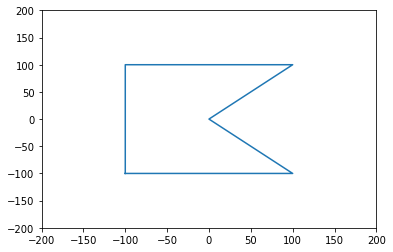

In [19]:
original_mat(A)

In [20]:
# Уменьшить объект в два раза (обртите внимание на размерность системы координат)
@plotter
def resize(mat, resize_value):
    transformed = np.eye(mat.shape[1],mat.shape[1]) * resize_value
    return mat @ transformed

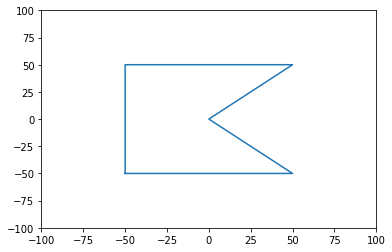

In [21]:
resize(A, 0.5)

In [22]:
# Повернуть на 130 градусов
@plotter
def turn(mat, degree):
    turn_mat = np.array([[np.cos(degree), -np.sin(degree)], 
                         [np.sin(degree), np.cos(degree)]])
    return mat @ turn_mat

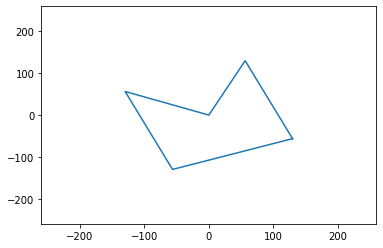

In [23]:
turn(A, 130)

In [24]:
# Отразить объект относительно прямой y=x

@plotter
def reflect(mat):
    mat = np.c_[ mat, np.ones(mat.shape[0])]
    transform_matrix = np.array([[0, 1, 0], 
                                 [1, 0, 0], 
                                 [0, 0, 1]])
    return mat @ transform_matrix

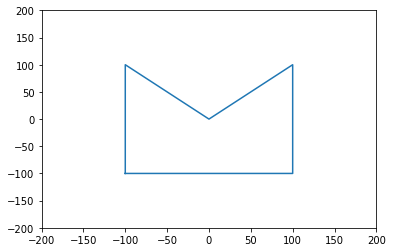

In [25]:
reflect(A)

In [26]:
# Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). 
# Смещение на (200, 300) и масштабирование на (0.5, 1.2)

@plotter
def shift_n_scale(mat):
    shift_matrix = (200, 300)
    scale_matrix = (0.5, 1.2)
    mat = np.array([mat[:,0] * scale_matrix[0] + shift_matrix[0],
                    mat[:,1] * scale_matrix[1] + shift_matrix[1]]).T
    return mat

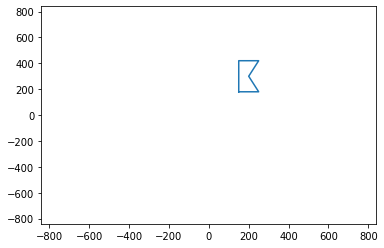

In [27]:
shift_n_scale(A)